In [2]:
import sys
import os
import scipy.constants
import glob as glob
import cqws.solver_qws as solver
from cqws.tools import plotstyle

Custom style created and loaded successfully.


Total layer number: 3
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5388   |   HH1->-0.0050    |   LH1->-0.0132    |
|   E2-> 1.5947   |   HH2->-0.0199    |   LH2->-0.0482    |
CPU times: user 2.54 s, sys: 2.77 s, total: 5.31 s
Wall time: 736 ms


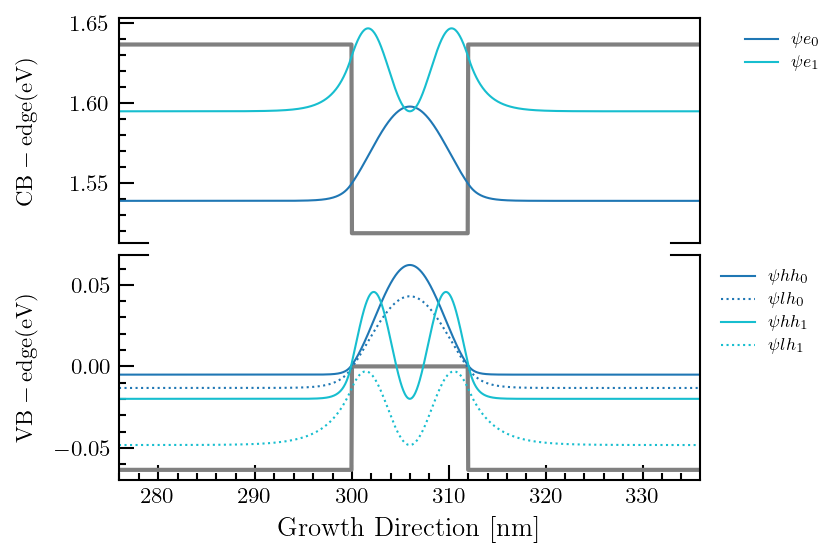

In [3]:
%%time

class Structure(object): pass
s = Structure() # this will be our datastructure
s.structure_name="iico-qws"
# TEMPERATURE
s.T = 12#Kelvin
# Binding Energy
s.HHBinding =6.1e-3 #meV
s.LHBinding =6.8e-3 #meV
# Band Offset ratios
s.Qc = 0.65
s.Qv = 0.35

# Total subband number to be calculated for electrons
s.subbands = 2
# APPLIED ELECTRIC FIELD
s.Fapp = 0e4 # (V/m)

# For 1D, z-axis is choosen
s.gridfactor = 0.05#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s.material =[
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
            [ 12,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

structure = s
nm = 1e-9
# RUN SIMULATION
model = solver.StructureFrom(structure) #
xaxis=model.xaxis/nm
cb=model.cb
vb=model.vb
results=solver.Solver(model).QuantumSolutions(absolute =True,Print=True)
f = solver.Solver(model).plotting(results,amp=10,axmin=30,axmax=30,eymin =-0.01,eymax=0.01,hymin=-0.2,hymax=-2,save=False);


10

In [6]:
f.savefig('example.png', bbox_inches='tight', pad_inches=0,transparent=True)
